#### Race Data

## Install Census Module

In [1]:
!pip install census

#### Race Data

## Install US Module

In [2]:
!pip install us

#### Race Data

## Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
import scipy.stats as st
from scipy.stats import linregress

#### Race Data

## Import API Keys

In [4]:
# Import Census API Key
from api_keys import (g_key, census_key)
c = Census(census_key, year=2013)

#### Race Data

## Census API Call

In [5]:
# Census API Call
census_county_data = c.acs5.state_county(("NAME", "B01003_001E", "B02001_002E", "B02001_003E", "B02001_004E", "B02001_005E", "B02001_006E", "B02001_007E", "B02001_008E"), Census.ALL, Census.ALL)
census_county_df = pd.DataFrame(census_county_data)
census_county_df.head()

,NAME,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,state,county
0,"Las Marías Municipio, Puerto Rico",9699.0,9372.0,158.0,23.0,0.0,0.0,112.0,34.0,72,083
1,"Añasco Municipio, Puerto Rico",29086.0,21607.0,869.0,0.0,21.0,0.0,4838.0,1751.0,72,011
2,"San Sebastián Municipio, Puerto Rico",41798.0,38569.0,622.0,0.0,24.0,0.0,2288.0,295.0,72,131
3,"Bayamón Municipio, Puerto Rico",204725.0,124341.0,16059.0,1624.0,688.0,5.0,17664.0,44344.0,72,021
4,"Cataño Municipio, Puerto Rico",27669.0,18876.0,2375.0,108.0,17.0,0.0,5054.0,1239.0,72,033


#### Race Data

## Data Cleaning - Drop "state" and "county" Columns

In [6]:
# Clean up the data
census_county_df = census_county_df.drop([ "state","county"],axis=1)
census_county_df.head()

,NAME,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E
0,"Las Marías Municipio, Puerto Rico",9699.0,9372.0,158.0,23.0,0.0,0.0,112.0,34.0
1,"Añasco Municipio, Puerto Rico",29086.0,21607.0,869.0,0.0,21.0,0.0,4838.0,1751.0
2,"San Sebastián Municipio, Puerto Rico",41798.0,38569.0,622.0,0.0,24.0,0.0,2288.0,295.0
3,"Bayamón Municipio, Puerto Rico",204725.0,124341.0,16059.0,1624.0,688.0,5.0,17664.0,44344.0
4,"Cataño Municipio, Puerto Rico",27669.0,18876.0,2375.0,108.0,17.0,0.0,5054.0,1239.0


#### Race Data

## Split "county" and "state" Columns

In [7]:
# Split County and State Column
census_county_df[['county','state']] = census_county_df['NAME'].str.split(", ", expand=True)
census_county_df.head()

,NAME,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,county,state
0,"Las Marías Municipio, Puerto Rico",9699.0,9372.0,158.0,23.0,0.0,0.0,112.0,34.0,Las Marías Municipio,Puerto Rico
1,"Añasco Municipio, Puerto Rico",29086.0,21607.0,869.0,0.0,21.0,0.0,4838.0,1751.0,Añasco Municipio,Puerto Rico
2,"San Sebastián Municipio, Puerto Rico",41798.0,38569.0,622.0,0.0,24.0,0.0,2288.0,295.0,San Sebastián Municipio,Puerto Rico
3,"Bayamón Municipio, Puerto Rico",204725.0,124341.0,16059.0,1624.0,688.0,5.0,17664.0,44344.0,Bayamón Municipio,Puerto Rico
4,"Cataño Municipio, Puerto Rico",27669.0,18876.0,2375.0,108.0,17.0,0.0,5054.0,1239.0,Cataño Municipio,Puerto Rico


#### Race Data

## More Data Cleaning - Remove Whitespace

In [8]:
# More data cleaning, removing whitespace, etc...
census_county_df['county'] = census_county_df['county'].str.replace(" County", "")
census_county_df

,NAME,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,county,state
0,"Las Marías Municipio, Puerto Rico",9699.0,9372.0,158.0,23.0,0.0,0.0,112.0,34.0,Las Marías Municipio,Puerto Rico
1,"Añasco Municipio, Puerto Rico",29086.0,21607.0,869.0,0.0,21.0,0.0,4838.0,1751.0,Añasco Municipio,Puerto Rico
2,"San Sebastián Municipio, Puerto Rico",41798.0,38569.0,622.0,0.0,24.0,0.0,2288.0,295.0,San Sebastián Municipio,Puerto Rico
3,"Bayamón Municipio, Puerto Rico",204725.0,124341.0,16059.0,1624.0,688.0,5.0,17664.0,44344.0,Bayamón Municipio,Puerto Rico
4,"Cataño Municipio, Puerto Rico",27669.0,18876.0,2375.0,108.0,17.0,0.0,5054.0,1239.0,Cataño Municipio,Puerto Rico
...,...,...,...,...,...,...,...,...,...,...,...
3216,"Monroe County, West Virginia",13512.0,13248.0,86.0,32.0,0.0,0.0,0.0,146.0,Monroe,West Virginia
3217,"Morgan County, West Virginia",17502.0,17047.0,198.0,6.0,72.0,0.0,0.0,179.0,Morgan,West Virginia
3218,"Nicholas County, West Virginia",26168.0,25632.0,3.0,190.0,139.0,0.0,0.0,204.0,Nicholas,West Virginia
3219,"Ohio County, West Virginia",44156.0,41192.0,1690.0,63.0,436.0,0.0,87.0,688.0,Ohio,West Virginia


#### Race Data

## More Data Cleaning - Remove Duplicate "county"/"state"/NAME" Columns

In [9]:
# Drop Name Column (containing duplicate County/State info)
census_county_df = census_county_df.drop(["NAME"],axis=1)
census_county_df.head()

,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,county,state
0,9699.0,9372.0,158.0,23.0,0.0,0.0,112.0,34.0,Las Marías Municipio,Puerto Rico
1,29086.0,21607.0,869.0,0.0,21.0,0.0,4838.0,1751.0,Añasco Municipio,Puerto Rico
2,41798.0,38569.0,622.0,0.0,24.0,0.0,2288.0,295.0,San Sebastián Municipio,Puerto Rico
3,204725.0,124341.0,16059.0,1624.0,688.0,5.0,17664.0,44344.0,Bayamón Municipio,Puerto Rico
4,27669.0,18876.0,2375.0,108.0,17.0,0.0,5054.0,1239.0,Cataño Municipio,Puerto Rico


#### Race Data

## Arrange Columns - "state"/"county"/"Race"

In [10]:
# Arrange Columns by State and County
census_county_df = census_county_df[['state','county', 'B01003_001E', 'B02001_002E', 'B02001_003E', 'B02001_004E', 'B02001_005E', 'B02001_006E', 'B02001_007E', 'B02001_008E']]
census_county_df.head()

,state,county,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E
0,Puerto Rico,Las Marías Municipio,9699.0,9372.0,158.0,23.0,0.0,0.0,112.0,34.0
1,Puerto Rico,Añasco Municipio,29086.0,21607.0,869.0,0.0,21.0,0.0,4838.0,1751.0
2,Puerto Rico,San Sebastián Municipio,41798.0,38569.0,622.0,0.0,24.0,0.0,2288.0,295.0
3,Puerto Rico,Bayamón Municipio,204725.0,124341.0,16059.0,1624.0,688.0,5.0,17664.0,44344.0
4,Puerto Rico,Cataño Municipio,27669.0,18876.0,2375.0,108.0,17.0,0.0,5054.0,1239.0


#### Race Data

## Rename Column Headers (Census API)

In [11]:
# Rename Column Headers
census_county_df = census_county_df.rename(columns={"B01003_001E": "Population",
                                      "B02001_002E": "White",
                                      "B02001_003E": "Black or African American",
                                      "B02001_004E": "American Indian and Alaska Native",
                                      "B02001_005E": "Asian",
                                      "B02001_006E": "Hawaiian and Other Pacific Islander",
                                      "B02001_007E": "Other",
                                      "B02001_008E": "Two or More Mixed"})
census_county_df.head()

,state,county,Population,White,Black or African American,American Indian and Alaska Native,Asian,Hawaiian and Other Pacific Islander,Other,Two or More Mixed
0,Puerto Rico,Las Marías Municipio,9699.0,9372.0,158.0,23.0,0.0,0.0,112.0,34.0
1,Puerto Rico,Añasco Municipio,29086.0,21607.0,869.0,0.0,21.0,0.0,4838.0,1751.0
2,Puerto Rico,San Sebastián Municipio,41798.0,38569.0,622.0,0.0,24.0,0.0,2288.0,295.0
3,Puerto Rico,Bayamón Municipio,204725.0,124341.0,16059.0,1624.0,688.0,5.0,17664.0,44344.0
4,Puerto Rico,Cataño Municipio,27669.0,18876.0,2375.0,108.0,17.0,0.0,5054.0,1239.0


#### Race Data

## Read-In/Import COVID-19 Data

In [12]:
#Import covid data
covid_county_df = pd.read_csv('/Users/Tito/group_projects/my_project1_files/state_county_data_files/state_county_data_resources/us-counties.csv')
covid_county_df.head()

,date,county,state,fips,cases,deaths
0,1/21/20,Snohomish,Washington,53061.0,1,0
1,1/22/20,Snohomish,Washington,NaN,1,0
2,1/23/20,Snohomish,Washington,53061.0,1,0
3,1/24/20,Cook,Illinois,17031.0,1,0
4,1/24/20,Snohomish,Washington,53061.0,1,0


#### Race Data

## Set Data Timeline - As of 4/13/2020 (us-counties.csv)

In [13]:
# Set focus date as of 4/13/20
most_recent_covid_df = covid_county_df.loc[covid_county_df["date"]=="4/13/20"]
most_recent_covid_df.head()

,date,county,state,fips,cases,deaths
53848,4/13/20,Autauga,Alabama,1001.0,19,1
53849,4/13/20,Baldwin,Alabama,1003.0,78,1
53850,4/13/20,Barbour,Alabama,1005.0,10,0
53851,4/13/20,Bibb,Alabama,1007.0,17,0
53852,4/13/20,Blount,Alabama,1009.0,15,0


#### Race Data

## More Data Cleaning - Drop "date" Column

In [14]:
# Drop Date Column
most_recent_covid_df = most_recent_covid_df.drop(["date"],axis=1)
most_recent_covid_df.head()

,county,state,fips,cases,deaths
53848,Autauga,Alabama,1001.0,19,1
53849,Baldwin,Alabama,1003.0,78,1
53850,Barbour,Alabama,1005.0,10,0
53851,Bibb,Alabama,1007.0,17,0
53852,Blount,Alabama,1009.0,15,0


#### Race Data

## Create List of Midwest States

In [15]:
# Create a list of the Midwest states
mw_state_list = ["Illinois", 'Indiana','Iowa','Kansas','Michigan','Minnesota','Missouri','Nebraska','North Dakota','Ohio','South Dakota','Wisconsin']
mw_state_list

['Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'Ohio',
 'South Dakota',
 'Wisconsin']

#### Race Data

## Create New DataFrame Containing Midwest States & COVID-19 Data

In [16]:
# Select Midwest states covid data
mw_covid_county_df = most_recent_covid_df[most_recent_covid_df['state'].isin(mw_state_list)]
mw_covid_county_df = mw_covid_county_df[['state','county','fips','cases','deaths']]
mw_covid_county_df.head()

,state,county,fips,cases,deaths
54402,Illinois,Adams,17001.0,26,0
54403,Illinois,Bond,17005.0,4,0
54404,Illinois,Boone,17007.0,13,1
54405,Illinois,Bureau,17011.0,6,0
54406,Illinois,Calhoun,17013.0,1,0


#### Race Data

## Total Number of COVID-19 Cases Reported - All Midwest Counties

In [17]:
# Calculate Minumum and Maximum number of cases reported by county, from January thru 4-13-2020


# data.groupby('month', as_index=False).agg({"duration": "sum"})
#mw_covid_county_df.groupby('county', as_index = False).agg({"cases": "sum"})

grouped_cases = mw_covid_county_df.groupby('county').agg({"cases": [sum, min, max]})
grouped_cases.columns = ["_".join(x) for x in grouped_cases.columns.ravel()]

grouped_cases.head(10)


,cases_sum,cases_min,cases_max
county,,,
Adair,12,1,11
Adams,95,3,58
Allamakee,23,23,23
Allegan,23,23,23
Allen,193,37,156
Alpena,1,1,1
Anderson,1,1,1
Andrew,1,1,1
Anoka,68,68,68


#### Race Data

## Top 5 Number of COVID-19 Cases Reported - All Midwest Counties

In [18]:
# mw_census_covid_race_cases_df = mw_census_covid_df.sort_values(['cases', 'White (%)', 'Black or African American (%)', 'American Indian and Alaska Native (%)', 'Asian (%)', 'Hawaiian and Other Pacific Islander (%)', 'Other (%)', 'Two or More Mixed (%)'], ascending = False).groupby('state').head(5)

grouped_cases_max = grouped_cases.sort_values(['cases_max'], ascending = False).groupby('cases_max').head(5)

grouped_cases_max.head(5)


,cases_sum,cases_min,cases_max
county,,,
Cook,15474,15474,15474
Wayne,11722,1,11648
Oakland,5073,5073,5073
Macomb,3418,3418,3418
Marion,3123,3,3012


#### Race Data

## Total Number of COVID-19 Deaths Reported - All Midwest Counties

In [19]:
# Calculate Minumum and Maximum number of deaths reported by county, from January thru 4-13-2020


# data.groupby('month', as_index=False).agg({"duration": "sum"})
#mw_covid_county_df.groupby('county', as_index = False).agg({"cases": "sum"})

grouped_deaths = mw_covid_county_df.groupby('county').agg({"deaths": [sum, min, max]})
grouped_deaths.columns = ["_".join(x) for x in grouped_deaths.columns.ravel()]

grouped_deaths.head(10)

,deaths_sum,deaths_min,deaths_max
county,,,
Adair,0,0,0
Adams,1,0,1
Allamakee,1,1,1
Allegan,0,0,0
Allen,15,4,11
Alpena,0,0,0
Anderson,0,0,0
Andrew,0,0,0
Anoka,0,0,0


#### Race Data

## Top 5 Number of COVID-19 Deaths Reported - All Midwest Counties

In [20]:
# mw_census_covid_race_cases_df = mw_census_covid_df.sort_values(['cases', 'White (%)', 'Black or African American (%)', 'American Indian and Alaska Native (%)', 'Asian (%)', 'Hawaiian and Other Pacific Islander (%)', 'Other (%)', 'Two or More Mixed (%)'], ascending = False).groupby('state').head(5)

grouped_deaths_max = grouped_deaths.sort_values(['deaths_max'], ascending = False).groupby('deaths_max').head(5)

grouped_deaths_max.head(5)


,deaths_sum,deaths_min,deaths_max
county,,,
Wayne,766,0,760
Cook,543,543,543
Oakland,347,347,347
Macomb,240,240,240
Marion,123,0,123


#### Race Data

## Create New Midwest State and County DataFrame with Race Data

In [21]:
# Select Midwest states census data
mw_census_county_df = census_county_df[census_county_df['state'].isin(mw_state_list)]
mw_census_county_df.head()

,state,county,Population,White,Black or African American,American Indian and Alaska Native,Asian,Hawaiian and Other Pacific Islander,Other,Two or More Mixed
622,Michigan,Alcona,10785.0,10545.0,13.0,41.0,32.0,0.0,6.0,148.0
623,Michigan,Alger,9497.0,8232.0,672.0,312.0,37.0,0.0,3.0,241.0
624,Michigan,Allegan,111742.0,105033.0,1373.0,744.0,764.0,0.0,1821.0,2007.0
625,Michigan,Alpena,29399.0,28503.0,179.0,168.0,141.0,7.0,68.0,333.0
626,Michigan,Antrim,23504.0,22628.0,57.0,232.0,64.0,0.0,160.0,363.0


#### Race Data

## Check Counties Total

In [22]:
# Check the number of counties in each df
print(len(mw_covid_county_df['county']))
print(len(mw_census_county_df['county']))

831
1055


#### Race Data

## Merge COVID-19 and Census Data

In [23]:
# Merge covid and census data
mw_census_covid_df = mw_covid_county_df.merge(mw_census_county_df, how='inner', left_on=["state","county"], right_on=["state","county"] )
mw_census_covid_df.head()

,state,county,fips,cases,deaths,Population,White,Black or African American,American Indian and Alaska Native,Asian,Hawaiian and Other Pacific Islander,Other,Two or More Mixed
0,Illinois,Adams,17001.0,26,0,67152.0,62691.0,2420.0,88.0,522.0,0.0,421.0,1010.0
1,Illinois,Bond,17005.0,4,0,17665.0,16165.0,369.0,2.0,215.0,0.0,17.0,897.0
2,Illinois,Boone,17007.0,13,1,54068.0,48666.0,1309.0,49.0,835.0,0.0,2323.0,886.0
3,Illinois,Bureau,17011.0,6,0,34594.0,33210.0,231.0,121.0,220.0,3.0,423.0,386.0
4,Illinois,Calhoun,17013.0,1,0,5062.0,4978.0,6.0,3.0,14.0,0.0,0.0,61.0


#### Race Data

## Check Counties Total After Merge

In [24]:
print(len(mw_census_covid_df['county']))

824


## LIMITATIONS:

### Unable to calculate positive COVID rate by Race for each county in the Midwest:

* Total number of cases are listed by total population - NOT by Race
* All RACE combinations were not included in this study

In [25]:
# Calculate Race Population (%) for each county in the Midwest
mw_census_covid_df["White (%)"] = mw_census_covid_df["White"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["Black or African American (%)"] = mw_census_covid_df["Black or African American"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["American Indian and Alaska Native (%)"] = mw_census_covid_df["American Indian and Alaska Native"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["Asian (%)"] = mw_census_covid_df["Asian"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["Hawaiian and Other Pacific Islander (%)"] = mw_census_covid_df["Hawaiian and Other Pacific Islander"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["Other (%)"] = mw_census_covid_df["Other"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["Two or More Mixed (%)"] = mw_census_covid_df["Two or More Mixed"].astype(int)/mw_census_covid_df["Population"].astype(int)

mw_census_covid_df.head()

,state,county,fips,cases,deaths,Population,White,Black or African American,American Indian and Alaska Native,Asian,Hawaiian and Other Pacific Islander,Other,Two or More Mixed,White (%),Black or African American (%),American Indian and Alaska Native (%),Asian (%),Hawaiian and Other Pacific Islander (%),Other (%),Two or More Mixed (%)
0,Illinois,Adams,17001.0,26,0,67152.0,62691.0,2420.0,88.0,522.0,0.0,421.0,1010.0,0.933569,0.036038,0.001310,0.007773,0.000000,0.006269,0.015041
1,Illinois,Bond,17005.0,4,0,17665.0,16165.0,369.0,2.0,215.0,0.0,17.0,897.0,0.915086,0.020889,0.000113,0.012171,0.000000,0.000962,0.050778
2,Illinois,Boone,17007.0,13,1,54068.0,48666.0,1309.0,49.0,835.0,0.0,2323.0,886.0,0.900089,0.024210,0.000906,0.015444,0.000000,0.042964,0.016387
3,Illinois,Bureau,17011.0,6,0,34594.0,33210.0,231.0,121.0,220.0,3.0,423.0,386.0,0.959993,0.006677,0.003498,0.006359,0.000087,0.012228,0.011158
4,Illinois,Calhoun,17013.0,1,0,5062.0,4978.0,6.0,3.0,14.0,0.0,0.0,61.0,0.983406,0.001185,0.000593,0.002766,0.000000,0.000000,0.012051


#### Race Data

## Not Enough Data To Utilize - Skip For Now

In [26]:
# mw_state_race_df = mw_census_covid_df.groupby('state') 

# mw_state_race_df = pd.DataFrame(mw_state_race_df['White (%)'])

# mw_state_race_df
                                
# # First, set new df name equal to the previous df and rearrange columns
# # mw_state_race_df = mw_census_covid_df

# # mw_state_race_df.loc['percentages'] = mw_state_race_df

# # mw_state_race_df

# # percentages = pd.DataFrame([[White (%), Black or African American (%), American Indian and Alaska Native (%), Asian (%), Hawaiian and Other Pacific Islander (%), Other (%), Two or More Mixed (%)]], columns = ['White (%)', 'Black or African American (%)', 'American Indian and Alaska Native (%)', 'Asian (%)', 'Hawaiian and Other Pacific Islander (%)', 'Other (%)', 'Two or More Mixed (%)'])
# # percentages.style.bacground_gradient(cmap = 'Wistia', subset = ["White (%)"])\
# # .bacground_gradient(cmap = 'Reds', subset = ["Asian (%)"])\
# # .bacground_gradient(cmap = 'Wistia', subset = ["Black or African American (%)"])
                             





# # Calculate the Race Population (%) by state
# #mw_state_race_df = mw_census_covid_df[mw_census_covid_df['state'].isin(mw_state_list)]
# #mw_state_race_df = mw_census_covid_df.groupby('state')  
# #mw_state_race_df = pd.DataFrame(mw_state_race_df[['White (%)', 'Black or African American (%)', 'American Indian and Alaska Native (%)', 'Asian (%)', 'Hawaiian and Other Pacific Islander (%)', 'Other (%)', 'Two or More Mixed (%)']])
                                

# Most COVID-19 Cases By County (Midwest)

* Unanswered question: What are the total number of cases by Race per county?
* (Not enough data available)

In [27]:
# Greatest number of covid cases by all Midwest counties

# df.assign(total = df.bid1+df.bid2).sort_values(['itemX','total'],ascending=False).groupby('itemX').head(5)

mw_census_covid_race_cases_df = mw_census_covid_df.sort_values(['cases', 'White (%)', 'Black or African American (%)', 'American Indian and Alaska Native (%)', 'Asian (%)', 'Hawaiian and Other Pacific Islander (%)', 'Other (%)', 'Two or More Mixed (%)'], ascending = False).groupby('state').head(5)

mw_census_covid_race_cases_df


,state,county,fips,cases,deaths,Population,White,Black or African American,American Indian and Alaska Native,Asian,Hawaiian and Other Pacific Islander,Other,Two or More Mixed,White (%),Black or African American (%),American Indian and Alaska Native (%),Asian (%),Hawaiian and Other Pacific Islander (%),Other (%),Two or More Mixed (%)
11,Illinois,Cook,17031.0,15474,543,5212372.0,2955886.0,1272312.0,12644.0,336055.0,1105.0,529889.0,104481.0,0.567090,0.244095,0.002426,0.064473,0.000212,0.101660,0.020045
398,Michigan,Wayne,26163.0,11648,760,1804507.0,954450.0,721705.0,6396.0,48823.0,279.0,31469.0,41385.0,0.528926,0.399946,0.003544,0.027056,0.000155,0.017439,0.022934
380,Michigan,Oakland,26125.0,5073,347,1213406.0,936853.0,165652.0,3088.0,71143.0,267.0,7869.0,28534.0,0.772085,0.136518,0.002545,0.058631,0.000220,0.006485,0.023516
367,Michigan,Macomb,26099.0,3418,240,845197.0,715360.0,78952.0,2179.0,27423.0,222.0,4441.0,16620.0,0.846383,0.093413,0.002578,0.032446,0.000263,0.005254,0.019664
135,Indiana,Marion,18097.0,3012,123,912242.0,578316.0,244753.0,2295.0,19393.0,112.0,42414.0,24959.0,0.633950,0.268298,0.002516,0.021259,0.000123,0.046494,0.027360
796,Wisconsin,Milwaukee,55079.0,1743,94,950527.0,593691.0,251082.0,5051.0,33244.0,270.0,36226.0,30963.0,0.624591,0.264150,0.005314,0.034974,0.000284,0.038111,0.032575
547,Missouri,St. Louis,29189.0,1724,50,999725.0,702852.0,231544.0,1351.0,34907.0,116.0,6005.0,22950.0,0.703045,0.231608,0.001351,0.034917,0.000116,0.006007,0.022956
40,Illinois,Lake,17097.0,1516,45,702099.0,552805.0,47959.0,1411.0,44741.0,300.0,36691.0,18192.0,0.787360,0.068308,0.002010,0.063725,0.000427,0.052259,0.025911
83,Illinois,Will,17197.0,1283,63,679688.0,518956.0,74398.0,1204.0,32041.0,126.0,36671.0,16292.0,0.763521,0.109459,0.001771,0.047141,0.000185,0.053953,0.023970
17,Illinois,DuPage,17043.0,1223,56,922803.0,740739.0,42553.0,1601.0,95090.0,343.0,22073.0,20404.0,0.802705,0.046113,0.001735,0.103045,0.000372,0.023920,0.022111


#### Race Data

## Plotting COVID-19 Cases Per County in Midwest

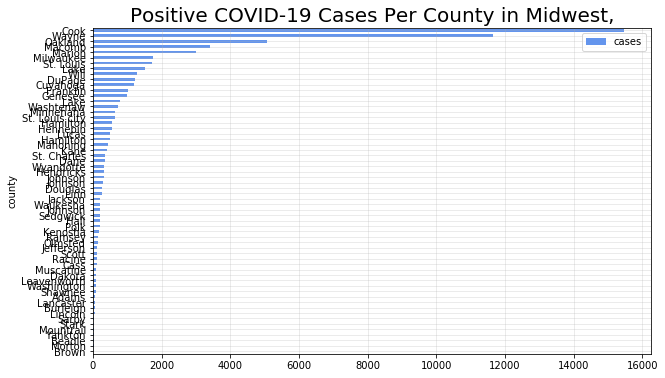

<Figure size 432x288 with 0 Axes>

In [28]:
# Plotting covid cases per county in Midwest

cases_chart = mw_census_covid_race_cases_df[["county", "cases"]]

# Drop NaN values
cases_chart = cases_chart.dropna()

# Set the index to be "County" so they will be used as labels
cases_chart = cases_chart.set_index("county").sort_values('cases')

# Use DataFrame.plot() to create a bar chart
cases_chart.plot(kind = "barh", color = "cornflowerblue", figsize = (10,6))

# Set a title for the chart
plt.title("Positive COVID-19 Cases Per County in Midwest,", fontsize = 20)
plt.grid(alpha = 0.3)
plt.show()
plt.tight_layout()
plt.savefig("/Users/Tito/group_projects/my_project1_files/state_county_data_files/state_county_data_images/positive_cases_county_midwest.png")





#### Race Data

## Top 10 Cases Per County DataFrame - All Midwest Counties

In [29]:
# Top 10 cases - New DataFrame
top_10_cases = mw_census_covid_race_cases_df.head(10)
top_10_cases

,state,county,fips,cases,deaths,Population,White,Black or African American,American Indian and Alaska Native,Asian,Hawaiian and Other Pacific Islander,Other,Two or More Mixed,White (%),Black or African American (%),American Indian and Alaska Native (%),Asian (%),Hawaiian and Other Pacific Islander (%),Other (%),Two or More Mixed (%)
11,Illinois,Cook,17031.0,15474,543,5212372.0,2955886.0,1272312.0,12644.0,336055.0,1105.0,529889.0,104481.0,0.567090,0.244095,0.002426,0.064473,0.000212,0.101660,0.020045
398,Michigan,Wayne,26163.0,11648,760,1804507.0,954450.0,721705.0,6396.0,48823.0,279.0,31469.0,41385.0,0.528926,0.399946,0.003544,0.027056,0.000155,0.017439,0.022934
380,Michigan,Oakland,26125.0,5073,347,1213406.0,936853.0,165652.0,3088.0,71143.0,267.0,7869.0,28534.0,0.772085,0.136518,0.002545,0.058631,0.000220,0.006485,0.023516
367,Michigan,Macomb,26099.0,3418,240,845197.0,715360.0,78952.0,2179.0,27423.0,222.0,4441.0,16620.0,0.846383,0.093413,0.002578,0.032446,0.000263,0.005254,0.019664
135,Indiana,Marion,18097.0,3012,123,912242.0,578316.0,244753.0,2295.0,19393.0,112.0,42414.0,24959.0,0.633950,0.268298,0.002516,0.021259,0.000123,0.046494,0.027360
796,Wisconsin,Milwaukee,55079.0,1743,94,950527.0,593691.0,251082.0,5051.0,33244.0,270.0,36226.0,30963.0,0.624591,0.264150,0.005314,0.034974,0.000284,0.038111,0.032575
547,Missouri,St. Louis,29189.0,1724,50,999725.0,702852.0,231544.0,1351.0,34907.0,116.0,6005.0,22950.0,0.703045,0.231608,0.001351,0.034917,0.000116,0.006007,0.022956
40,Illinois,Lake,17097.0,1516,45,702099.0,552805.0,47959.0,1411.0,44741.0,300.0,36691.0,18192.0,0.787360,0.068308,0.002010,0.063725,0.000427,0.052259,0.025911
83,Illinois,Will,17197.0,1283,63,679688.0,518956.0,74398.0,1204.0,32041.0,126.0,36671.0,16292.0,0.763521,0.109459,0.001771,0.047141,0.000185,0.053953,0.023970
17,Illinois,DuPage,17043.0,1223,56,922803.0,740739.0,42553.0,1601.0,95090.0,343.0,22073.0,20404.0,0.802705,0.046113,0.001735,0.103045,0.000372,0.023920,0.022111


#### Race Data

## Plotting Top 10 COVID-19 Cases Per County - All Midwest Counties

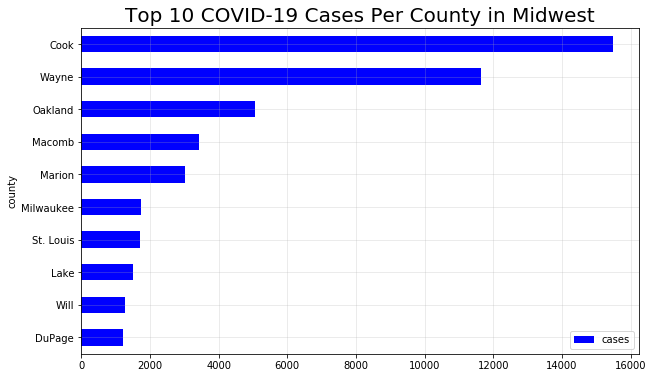

<Figure size 432x288 with 0 Axes>

In [30]:
# Plotting covid cases per county in Midwest

cases_chart = top_10_cases[["county", "cases"]]

# Drop NaN values
cases_chart = cases_chart.dropna()

# Set the index to be "County" so they will be used as labels
cases_chart = cases_chart.set_index("county").sort_values('cases')

# Use DataFrame.plot() to create a bar chart
cases_chart.plot(kind = "barh", color = "blue", figsize = (10,6))

# Set a title for the chart
plt.title("Top 10 COVID-19 Cases Per County in Midwest", fontsize = 20)
plt.grid(alpha = 0.3)
plt.show()
plt.tight_layout()
plt.savefig("/Users/Tito/group_projects/my_project1_files/state_county_data_files/state_county_data_images/top_10_cases_county_midwest.png")





# Most COVID-19 Deaths By County (Midwest)

* Unanswered question: What are the total number of deaths by Race per county?
* (Not enough data available)

In [31]:
# Greatest number of covid deaths by all Midwest counties

# df.assign(total = df.bid1+df.bid2).sort_values(['itemX','total'],ascending=False).groupby('itemX').head(5)

mw_census_covid_race_deaths_df = mw_census_covid_df.sort_values(['deaths', 'White (%)', 'Black or African American (%)', 'American Indian and Alaska Native (%)', 'Asian (%)', 'Hawaiian and Other Pacific Islander (%)', 'Other (%)', 'Two or More Mixed (%)'], ascending = False).groupby('state').head(5)

mw_census_covid_race_deaths_df


,state,county,fips,cases,deaths,Population,White,Black or African American,American Indian and Alaska Native,Asian,Hawaiian and Other Pacific Islander,Other,Two or More Mixed,White (%),Black or African American (%),American Indian and Alaska Native (%),Asian (%),Hawaiian and Other Pacific Islander (%),Other (%),Two or More Mixed (%)
398,Michigan,Wayne,26163.0,11648,760,1804507.0,954450.0,721705.0,6396.0,48823.0,279.0,31469.0,41385.0,0.528926,0.399946,0.003544,0.027056,0.000155,0.017439,0.022934
11,Illinois,Cook,17031.0,15474,543,5212372.0,2955886.0,1272312.0,12644.0,336055.0,1105.0,529889.0,104481.0,0.567090,0.244095,0.002426,0.064473,0.000212,0.101660,0.020045
380,Michigan,Oakland,26125.0,5073,347,1213406.0,936853.0,165652.0,3088.0,71143.0,267.0,7869.0,28534.0,0.772085,0.136518,0.002545,0.058631,0.000220,0.006485,0.023516
367,Michigan,Macomb,26099.0,3418,240,845197.0,715360.0,78952.0,2179.0,27423.0,222.0,4441.0,16620.0,0.846383,0.093413,0.002578,0.032446,0.000263,0.005254,0.019664
135,Indiana,Marion,18097.0,3012,123,912242.0,578316.0,244753.0,2295.0,19393.0,112.0,42414.0,24959.0,0.633950,0.268298,0.002516,0.021259,0.000123,0.046494,0.027360
796,Wisconsin,Milwaukee,55079.0,1743,94,950527.0,593691.0,251082.0,5051.0,33244.0,270.0,36226.0,30963.0,0.624591,0.264150,0.005314,0.034974,0.000284,0.038111,0.032575
344,Michigan,Genesee,26049.0,988,77,421575.0,315032.0,86003.0,2032.0,3931.0,115.0,1864.0,12598.0,0.747274,0.204004,0.004820,0.009325,0.000273,0.004422,0.029883
83,Illinois,Will,17197.0,1283,63,679688.0,518956.0,74398.0,1204.0,32041.0,126.0,36671.0,16292.0,0.763521,0.109459,0.001771,0.047141,0.000185,0.053953,0.023970
17,Illinois,DuPage,17043.0,1223,56,922803.0,740739.0,42553.0,1601.0,95090.0,343.0,22073.0,20404.0,0.802705,0.046113,0.001735,0.103045,0.000372,0.023920,0.022111
547,Missouri,St. Louis,29189.0,1724,50,999725.0,702852.0,231544.0,1351.0,34907.0,116.0,6005.0,22950.0,0.703045,0.231608,0.001351,0.034917,0.000116,0.006007,0.022956


#### Race Data

## Top 10 Deaths Per County DataFrame - All Midwest Counties

In [32]:
# Top 10 deaths - New DataFrame
top_10_deaths = mw_census_covid_race_deaths_df.head(10)
top_10_deaths


,state,county,fips,cases,deaths,Population,White,Black or African American,American Indian and Alaska Native,Asian,Hawaiian and Other Pacific Islander,Other,Two or More Mixed,White (%),Black or African American (%),American Indian and Alaska Native (%),Asian (%),Hawaiian and Other Pacific Islander (%),Other (%),Two or More Mixed (%)
398,Michigan,Wayne,26163.0,11648,760,1804507.0,954450.0,721705.0,6396.0,48823.0,279.0,31469.0,41385.0,0.528926,0.399946,0.003544,0.027056,0.000155,0.017439,0.022934
11,Illinois,Cook,17031.0,15474,543,5212372.0,2955886.0,1272312.0,12644.0,336055.0,1105.0,529889.0,104481.0,0.567090,0.244095,0.002426,0.064473,0.000212,0.101660,0.020045
380,Michigan,Oakland,26125.0,5073,347,1213406.0,936853.0,165652.0,3088.0,71143.0,267.0,7869.0,28534.0,0.772085,0.136518,0.002545,0.058631,0.000220,0.006485,0.023516
367,Michigan,Macomb,26099.0,3418,240,845197.0,715360.0,78952.0,2179.0,27423.0,222.0,4441.0,16620.0,0.846383,0.093413,0.002578,0.032446,0.000263,0.005254,0.019664
135,Indiana,Marion,18097.0,3012,123,912242.0,578316.0,244753.0,2295.0,19393.0,112.0,42414.0,24959.0,0.633950,0.268298,0.002516,0.021259,0.000123,0.046494,0.027360
796,Wisconsin,Milwaukee,55079.0,1743,94,950527.0,593691.0,251082.0,5051.0,33244.0,270.0,36226.0,30963.0,0.624591,0.264150,0.005314,0.034974,0.000284,0.038111,0.032575
344,Michigan,Genesee,26049.0,988,77,421575.0,315032.0,86003.0,2032.0,3931.0,115.0,1864.0,12598.0,0.747274,0.204004,0.004820,0.009325,0.000273,0.004422,0.029883
83,Illinois,Will,17197.0,1283,63,679688.0,518956.0,74398.0,1204.0,32041.0,126.0,36671.0,16292.0,0.763521,0.109459,0.001771,0.047141,0.000185,0.053953,0.023970
17,Illinois,DuPage,17043.0,1223,56,922803.0,740739.0,42553.0,1601.0,95090.0,343.0,22073.0,20404.0,0.802705,0.046113,0.001735,0.103045,0.000372,0.023920,0.022111
547,Missouri,St. Louis,29189.0,1724,50,999725.0,702852.0,231544.0,1351.0,34907.0,116.0,6005.0,22950.0,0.703045,0.231608,0.001351,0.034917,0.000116,0.006007,0.022956


#### Race Data

## Plotting Top 10 COVID-19 Deaths Per County - All Midwest Counties

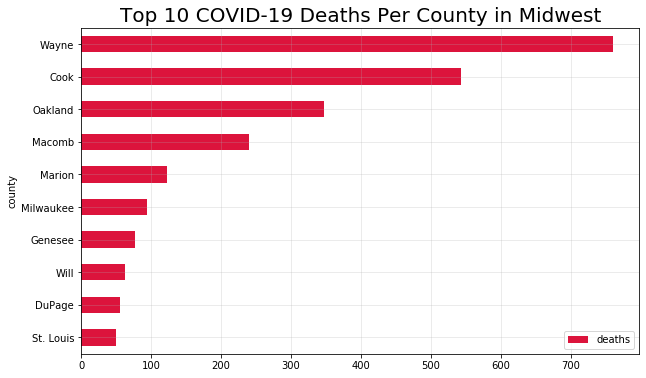

<Figure size 432x288 with 0 Axes>

In [33]:
# Plotting covid deaths per county in Midwest

deaths_chart = top_10_deaths[["county", "deaths"]]

# Drop NaN values
deaths_chart = deaths_chart.dropna()

# Set the index to be "County" so they will be used as labels
deaths_chart = deaths_chart.set_index("county").sort_values('deaths')

# Use DataFrame.plot() to create a bar chart
deaths_chart.plot(kind = "barh", color = "crimson", figsize = (10,6))

# Set a title for the chart
plt.title("Top 10 COVID-19 Deaths Per County in Midwest", fontsize = 20)
plt.grid(alpha = 0.3)
plt.show()
plt.tight_layout()
plt.savefig("/Users/Tito/group_projects/my_project1_files/state_county_data_files/state_county_data_images/top_10_deaths_county_midwest.png")




#### Race Data

## Not using this data

In [34]:
bottom_10_deaths = mw_census_covid_race_deaths_df.tail(10)
bottom_10_deaths

,state,county,fips,cases,deaths,Population,White,Black or African American,American Indian and Alaska Native,Asian,Hawaiian and Other Pacific Islander,Other,Two or More Mixed,White (%),Black or African American (%),American Indian and Alaska Native (%),Asian (%),Hawaiian and Other Pacific Islander (%),Other (%),Two or More Mixed (%)
312,Kansas,Saline,20169.0,10,2,55633.0,49580.0,1630.0,289.0,1319.0,66.0,894.0,1855.0,0.891198,0.029299,0.005195,0.023709,0.001186,0.016070,0.033344
248,Iowa,Tama,19171.0,101,2,17661.0,15695.0,88.0,1309.0,71.0,0.0,222.0,276.0,0.888681,0.004983,0.074118,0.004020,0.000000,0.012570,0.015628
749,South Dakota,Minnehaha,46099.0,654,2,173108.0,151573.0,6762.0,4459.0,2880.0,89.0,3814.0,3531.0,0.875598,0.039062,0.025758,0.016637,0.000514,0.022032,0.020398
612,North Dakota,Emmons,38029.0,1,1,3521.0,3474.0,0.0,2.0,14.0,0.0,4.0,27.0,0.986652,0.000000,0.000568,0.003976,0.000000,0.001136,0.007668
616,North Dakota,McHenry,38049.0,1,1,5593.0,5470.0,3.0,35.0,16.0,0.0,6.0,63.0,0.978008,0.000536,0.006258,0.002861,0.000000,0.001073,0.011264
746,South Dakota,McCook,46087.0,2,1,5605.0,5474.0,18.0,43.0,16.0,0.0,17.0,37.0,0.976628,0.003211,0.007672,0.002855,0.000000,0.003033,0.006601
571,Nebraska,Custer,31041.0,19,1,10872.0,10604.0,56.0,15.0,1.0,0.0,48.0,148.0,0.975350,0.005151,0.001380,0.000092,0.000000,0.004415,0.013613
600,Nebraska,Washington,31177.0,22,1,20234.0,19728.0,99.0,61.0,46.0,17.0,26.0,257.0,0.974993,0.004893,0.003015,0.002273,0.000840,0.001285,0.012701
732,South Dakota,Davison,46035.0,3,1,19622.0,18521.0,85.0,593.0,33.0,0.0,108.0,282.0,0.943890,0.004332,0.030221,0.001682,0.000000,0.005504,0.014372
752,South Dakota,Sanborn,46111.0,2,0,2348.0,2327.0,0.0,7.0,2.0,0.0,5.0,7.0,0.991056,0.000000,0.002981,0.000852,0.000000,0.002129,0.002981


#### Race Data

## Not using this data


In [35]:
# # Plotting bottom 10 deaths per county in Midwest

# cases_chart = bottom_10_deaths[["county", "deaths"]]

# # Drop NaN values
# cases_chart = cases_chart.dropna()

# # Set the index to be "County" so they will be used as labels
# cases_chart = cases_chart.set_index("county").sort_values('deaths')

# # Use DataFrame.plot() to create a bar chart
# cases_chart.plot(kind = "barh", color = "crimson", figsize = (10,6))

# # Set a title for the chart
# plt.title("Bottom 10 COVID-19 Deaths Per County in Midwest,", fontsize = 20)
# plt.grid(alpha = 0.3)
# plt.show()
# plt.tight_layout()
# plt.savefig("/Users/Tito/group_projects/my_project1_files/state_county_data_files/state_county_data_images/bottom_10_deaths_county_midwest.png")




#### Race Data

## New DataFrame - Race Population % - All Midwest Counties

In [36]:
# Create df to display toal Race population by county, from January thru 4-13-2020


# data.groupby('month', as_index=False).agg({"duration": "sum"})
#mw_covid_county_df.groupby('county', as_index = False).agg({"cases": "sum"})

grouped_race = mw_census_covid_df[['state', 'county', 'Population', 'White (%)', 'Black or African American (%)', 'American Indian and Alaska Native (%)', 'Asian (%)', 'Hawaiian and Other Pacific Islander (%)', 'Other (%)', 'Two or More Mixed (%)']]


grouped_race.head(10) # Top 10 population by race


,state,county,Population,White (%),Black or African American (%),American Indian and Alaska Native (%),Asian (%),Hawaiian and Other Pacific Islander (%),Other (%),Two or More Mixed (%)
0,Illinois,Adams,67152.0,0.933569,0.036038,0.001310,0.007773,0.000000,0.006269,0.015041
1,Illinois,Bond,17665.0,0.915086,0.020889,0.000113,0.012171,0.000000,0.000962,0.050778
2,Illinois,Boone,54068.0,0.900089,0.024210,0.000906,0.015444,0.000000,0.042964,0.016387
3,Illinois,Bureau,34594.0,0.959993,0.006677,0.003498,0.006359,0.000087,0.012228,0.011158
4,Illinois,Calhoun,5062.0,0.983406,0.001185,0.000593,0.002766,0.000000,0.000000,0.012051
5,Illinois,Carroll,15199.0,0.962695,0.008422,0.001250,0.003750,0.000395,0.005461,0.018028
6,Illinois,Champaign,202428.0,0.746073,0.124321,0.001887,0.093767,0.000104,0.008680,0.025169
7,Illinois,Christian,34651.0,0.962050,0.018095,0.002540,0.005252,0.000491,0.006118,0.005454
8,Illinois,Clark,16284.0,0.979182,0.003193,0.000737,0.003685,0.000491,0.001719,0.010992
9,Illinois,Clinton,37891.0,0.940012,0.034626,0.001557,0.005569,0.000000,0.005278,0.012958


#### Race Data

## Top 10 Population - All Midwest Counties

In [37]:
# Top 10 County Population in Midwest

total_white = mw_census_covid_df["White"].sum()
total_black = mw_census_covid_df["Black or African American"].sum()
total_native = mw_census_covid_df["American Indian and Alaska Native"].sum()
total_asian = mw_census_covid_df["Asian"].sum()
total_hawaiian = mw_census_covid_df["Hawaiian and Other Pacific Islander"].sum()
total_other = mw_census_covid_df["Other"].sum()
total_mixed = mw_census_covid_df["Two or More Mixed"].sum()


total = pd.DataFrame([[total_white, total_black, total_native, total_asian, total_hawaiian, total_other, total_mixed]], columns = ['White', 'Black', 'Native', 'Asian', 'Hawaiian', 'Other', 'Mixed'])

total


,White,Black,Native,Asian,Hawaiian,Other,Mixed
0,53356909.0,6896785.0,354136.0,1794561.0,23607.0,1500232.0,1488698.0


#### Race Data

## Plotting Pie Chart - Race Distribution in Midwest

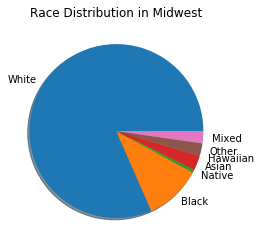

In [38]:
# Create Pie Chart
# gender_group_count.plot(kind='pie', y='Sex', title="Distribution of mice gender",autopct='%1.1f%%'
# plt.pie(gender_counts, labels=genders,autopct=“%1.1f%%“, shadow=True)


labels = ["White", "Black", "Native", "Asian", "Hawaiian", "Other", "Mixed"]
values = [53356909.0, 6896785.0, 354136.0, 1794561.0, 23607.0, 1500232.0, 1488698.0]

plt.pie(values, labels = labels, shadow=True)

plt.title("Race Distribution in Midwest")

plt.show()


#### Race Data

## Plotting Pie Chart - Race Distribution in Midwest

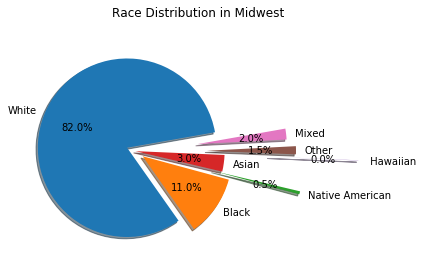

In [39]:
# Pie chart
labels = ['White', 'Black', 'Native American', 'Asian', ' Hawaiian', 'Other', 'Mixed']
sizes = [82, 11, 0.54, 3, 0.04, 1.46, 1.96]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0.1, 0.9, 0, 1.5, 0.8, 0.7)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow = True, startangle = 10)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title("Race Distribution in Midwest")
plt.tight_layout()
plt.show()